<a href="https://colab.research.google.com/github/goeunleee/deeplearning_stuey/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D1%EC%9D%BC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! apt-get update -qq
! apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

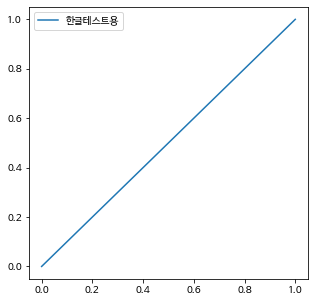

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

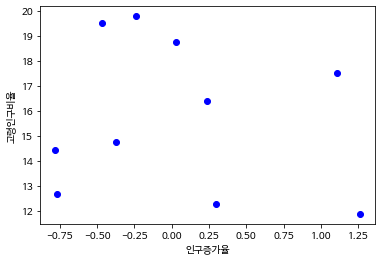

In [ ]:
#population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37]

#population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74]

population_inc = [0.3, -0.78, 1.26, 0.03, 1.11,  0.24, -0.24, -0.47, -0.77, -0.37]

population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('인구증가율')
plt.ylabel('고령인구비율')
plt.show()

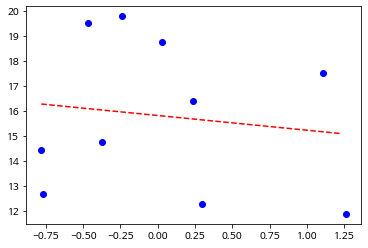

In [ ]:
# 최소 제곱법

x_bar = sum(population_inc)/len(population_inc)
y_bar = sum(population_old)/len(population_old)

x = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37]
x = x[:5] + x[6:]
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74]
y = y[:5]+y[6:]




#원래 값 - 구해진 값
# y = a * x + b

a = sum([(y-y_bar)*(x-x_bar) for y, x in list(zip(y,x))])

a = a / sum([(i-x_bar)**2 for i in x ])
#기울기 a = (x-x평균 )(y-y평균)의 합 / (x-x평균)의 제곱의 합
a

b = y_bar - (a*x_bar)
#절편 b = y평균 - (x 평균 * a)

import numpy as np

line_x = np.arange(min(x), max(x),1)
line_y =a * line_x + b
plt.plot(line_x, line_y, 'r--')

plt.plot(x,y,'bo')

plt.show()

In [ ]:
a = [1,2,3]
b = [4,5,6]

for i,j in list(zip(a,b)):
  print(i,j)

1 4
2 5
3 6


In [ ]:
import random
import tensorflow as tf
import numpy as np

#인구증가율
x = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37]
x = x[:5] + x[6:]
#고령인구비율
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74]
y = y[:5]+y[6:]

a = tf.Variable(random.random())
b = tf.Variable(random.random())

def compute_loss():
  y_pred = a * x + b
  loss = tf.reduce_mean((y-y_pred)**2)

  return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)

for i in range(2000):
  optimizer.minimize(compute_loss, var_list=[a,b])
  if i % 100 == 99:
    print("{} ,{} ,{}".format(i, a.numpy(), compute_loss().numpy()))

99 ,0.044772110879421234 ,95.17758178710938
199 ,-0.2646162211894989 ,30.899572372436523
299 ,-0.4489954113960266 ,12.322450637817383
399 ,-0.5386848449707031 ,8.624585151672363
499 ,-0.573915421962738 ,8.128168106079102
599 ,-0.5851171612739563 ,8.083332061767578
699 ,-0.5880083441734314 ,8.08061408996582
799 ,-0.5886110663414001 ,8.08050537109375
899 ,-0.5887119174003601 ,8.080500602722168
999 ,-0.5887267589569092 ,8.080503463745117
1099 ,-0.5887264013290405 ,8.080500602722168
1199 ,-0.5887261629104614 ,8.080501556396484
1299 ,-0.588726818561554 ,8.0805025100708
1399 ,-0.5887265205383301 ,8.080500602722168
1499 ,-0.5887263417243958 ,8.080499649047852
1599 ,-0.5887263417243958 ,8.080499649047852
1699 ,-0.5887265801429749 ,8.0805025100708
1799 ,-0.5887266993522644 ,8.080500602722168
1899 ,-0.5887258052825928 ,8.0805025100708
1999 ,-0.5887264013290405 ,8.080500602722168


In [ ]:
#optimizer : 최적화 함수 


In [ ]:
#인구증가율
x = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37]
x = x[:5] + x[6:]
#고령인구비율
y = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74]
y = y[:5]+y[6:]

model = tf.keras.Sequential([
     tf.keras.layers.Dense(units=6, activation='sigmoid', input_shape=(1, )),
     tf.keras.layers.Dense(units=1)                        
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),loss='mse')
history = model.fit(x,y,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 268.4085
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 70.4526
Epoch 3/200
1/1 [==============================] - 0s 1ms/step - loss: 13.3314
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 8.4395
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 8.3417
Epoch 6/200
1/1 [==============================] - 0s 2ms/step - loss: 8.2762
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 8.2223
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 8.1777
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 8.1406
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 8.1097
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 8.0836
Epoch 12/200
1/1 [==============================] - 0s 2ms/step - loss: 8.0616
Epoch 13/200
1/1 [==============================] - 0s 1m

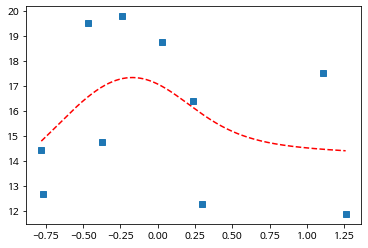

In [ ]:
import matplotlib.pyplot as plt

line_x = np.arange(min(x),max(x),0.0001)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r--')
plt.plot(x,y,'s')
plt.show()

In [ ]:
import tensorflow as tf

data_path = tf.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
data_path

import pandas as pd

column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Modelyear', 'Origin']
raw_dataset = pd.read_csv(data_path, names= column_names, na_values="?", comment='\t', sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Modelyear,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Modelyear     398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [ ]:
dataset.dropna()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Modelyear,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:

one_hot_endoded_col = pd.get_dummies(dataset['Origin'])
one_hot_endoded_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       398 non-null    uint8
 1   2       398 non-null    uint8
 2   3       398 non-null    uint8
dtypes: uint8(3)
memory usage: 1.3 KB


In [ ]:
res = pd.concat([dataset, one_hot_endoded_col],axis=1)
del res['Origin']

In [ ]:
res

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Modelyear,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [ ]:
#pd.get_dummies(dataset['Origin']==1)
pd.get_dummies(dataset['Origin']==2)
#pd.get_dummies(dataset['Origin']==3)

,False,True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
393,1,0
394,0,1
395,1,0
396,1,0


In [ ]:
res.columns


Index([         'MPG',    'Cylinders', 'Displacement',   'Horsepower',
             'Weight', 'Acceleration',    'Modelyear',              1,
                    2,              3],
      dtype='object')

In [ ]:
res.rename(columns= {'Japan' : 'USA'}, inplace=True)
res.rename(columns= {2 : 'Europe'}, inplace=True)
res.rename(columns= {3 : 'Japan'}, inplace=True)

In [ ]:
res

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Modelyear,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
